# Assignment-1 Solution

## Problem 1: Analyzing Employee Performance Data with NumPy

**Objective:** Analyze employee performance data to generate insights and new metrics using NumPy.

**Dataset:** The `employee_performance.csv` contains employee performance metrics from TechSolutions Inc., focusing on sales team effectiveness. It includes the following columns:

* **EmployeeID**: A unique identifier for each employee.

* **Sales**: The total sales amount generated by the employee during a specific period.

* **Target**: The sales target set for the employee, representing the expected sales goal.

* **HoursWorked**: The total hours logged by the employee while working to achieve their sales targets.


This dataset is essential for analyzing employee performance, setting future targets, and identifying training needs to enhance sales efficiency at TechSolutions Inc.

**Tasks:**

* Read the CSV file into a NumPy array.

* Implement three functions to generate new columns based on existing data:

    * **Performance Percentage**: Calculate the percentage of sales achieved against the target (Sales / Target * 100).
    * **Efficiency**: Calculate efficiency as the ratio of sales to hours worked (Sales / HoursWorked).
    * **Bonus**: Calculate the bonus amount based on performance percentage:
    
        * If PerformancePercentage >= 100, the bonus is 10% of sales.
        * If PerformancePercentage >= 80, the bonus is 5% of sales.
        * Otherwise, the bonus is 0.

* Implement a function `analyze_performance(array)` that performs the following:

    * Calculates the mean performance percentage, efficiency, and total bonus across all employees.

    * Finds the employee with the highest performance percentage.

    * Returns a dictionary with the mean values and the details of the top employee (including the entire row). **Hint:** Use the `argmax()` function.


In [1]:
import numpy as np

# Read the CSV file into a NumPy array
sales_data = np.genfromtxt('employee_performance.csv', delimiter=",", skip_header = True, dtype = float)

# Performance Percentage: Calculate the percentage of sales achieved against the target (Sales / Target * 100).
def performance_percentage(sales_data):
    """ Calculates the performance percentage of sales against targets from the provided sales data.
    
    Args:
        sales_data (NumPy array): A 2D array where each row represents a sales record.
                                The second column (index 1) contains actual sales amounts,
                                and the third column (index 2) contains target sales amounts.

    Returns:
        NumPy array: An array of performance percentages.
    """
    sales = sales_data[:, 1]
    target = sales_data[:, 2]
    return (sales/target)*100

# Efficiency: Calculate efficiency as the ratio of sales to hours worked (Sales / HoursWorked).
def calculate_efficiency(sales_data):
    """ Calculates the efficiency as the ratio of sales to hours worked (Sales / HoursWorked)
    
    Args:
        sales_data (NumPy array): A 2D array where each row represents a sales record.
                                The second column (index 1) contains actual sales amounts,
                                and the fourth column (index 3) contains the number of hours worked.

    Returns:
        NumPy array: An array of employee efficiencies.
    """
    sales = sales_data[:, 1]
    hours_worked = sales_data[:, 3]
    return sales/hours_worked

# Bonus: Calculate the bonus amount based on performance percentage:
# If PerformancePercentage >= 100, the bonus is 10% of sales.
# If PerformancePercentage >= 80, the bonus is 5% of sales.
# Otherwise, the bonus is 0
def calculate_bonus(sales_data):
    """ Calculates the bonus for sales based on performance percentages.
        Bonuses are awarded as follows:
        - 10% of sales if performance is 100% or higher.
        - 5% of sales if performance is between [80%, 100%).

    Args:
        sales_data (NumPy array): A 2D array where each row represents a sales record.
                                The second column (index 1) contains actual sales amounts,
                                and the third column (index 2) contains target sales amounts.

    Returns:
        NumPy array: An array of bonuses corresponding to each sales record. 
    """
    performance = performance_percentage(sales_data)
    sales = sales_data[:, 1]
    bonus = np.zeros(len(sales))
    for s, p, i in zip(sales, performance, range(len(sales))):
        if p >= 100:
            bonus[i] = s * 0.1
        elif p >= 80:
            bonus[i] = s * 0.05
    return bonus
    
    # Alternate solution
    # bonus = np.where(performance >= 100, sales * 0.10, np.where(performance >= 80, sales * 0.05, 0))

def analyze_performance(sales_data):
    """ Evaluates the sales data to compute various performance metrics, including the mean performance 
         percentage, mean efficiency, total bonuses awarded, and identifies the employee with the highest performance.

    Args:
        sales_data (NumPy array): A 2D array where each row represents a sales record 
                                The first column (index 0) contains employee ID,
                                the second column (index 1) contains actual sales amounts,
                                the third column (index 2) contains target sales amounts.
                                and the fourth column (index 3) contains the number of hours worked.

    Returns:
        dict: A dictionary containing:
            * 'mean_performance' (float): The average performance percentage across all records.
            * 'mean_efficiency' (float): The average efficiency calculated from the sales data.
            * 'total_bonus' (float): The total bonuses awarded to all employees.
            * 'top_employee' (NumPy array): The sales record of the employee with the highest performance.
    """
    performance = performance_percentage(sales_data)
    efficiency = calculate_efficiency(sales_data)
    bonus = calculate_bonus(sales_data)
    
    mean_performance = np.mean(performance)
    mean_efficiency = np.mean(efficiency)
    total_bonus = np.sum(bonus)

    # Find the employee with the highest performance
    top_employee_index = np.argmax(performance)
    top_employee = sales_data[top_employee_index, :]

    return {
        'mean_performance': mean_performance,
        'mean_efficiency': mean_efficiency,
        'total_bonus': total_bonus,
        'top_employee': top_employee
    }

summary = analyze_performance(sales_data)
print("Average Performance Percentage = {:.2f}%".format(summary['mean_performance']))
print("Average Efficiency = {:.2f}".format(summary['mean_efficiency']))
print("Total Bonus = ${:.2f}".format(summary['total_bonus']))
print("Top Employee = (ID:{:.0f}, Sales: ${:.2f}, Target: ${:.2f}, Hours Worked: {:.0f})".format(summary['top_employee'][0],
                                                                                            summary['top_employee'][1],
                                                                                            summary['top_employee'][2],
                                                                                            summary['top_employee'][3]))

Average Performance Percentage = 87.17%
Average Efficiency = 3.94
Total Bonus = $582.75
Top Employee = (ID:3, Sales: $150.00, Target: $150.00, Hours Worked: 35)


## Problem 2: Pandas DataFrames and Data Visualization

**Objective:** Analyze an IT support services dataset using Pandas and provide insights.

**Dataset:** The dataset captures IT support services provided by Durham Technical Services (DTS). It includes the following columns:
* **Call ID:** A unique identifier for each support call.

* **Customer Name:** The name of the customer who initiated the support request.

* **Call Type:** The category of the support call (e.g., Support, Inquiry, etc.).

* **Rate:** The hourly rate charged for the support service.

* **Opened Date:** The date when the support call was initiated.

* **Closed Date:** The date when the support call was resolved.

* **Days Open:** The total number of days the support call remained open.

* **Hours Logged:** The total hours spent by technicians on the call.

* **Amount Billed:** The total amount charged to the customer for the support provided.

This dataset is crucial for analyzing service efficiency, financial performance, and customer satisfaction at DTS, helping to improve operational processes and enhance client relations.

**Tasks:**

* Read the CSV file into a Pandas DataFrame.

* Create the following new columns:

    * **Rate Level:** A column that indicates if the rate is high, medium, or low. **Hint:** Create a function named rate_category(rate) and apply it to the Rate column.
        
        * Low: Rate <= 50
        * Medium: Rate >50 and Rate <=75
        * High: Rate > 75

    * **Quick Resolution:** A boolean column that indicates if the number of days open is less than or equal to 2.
	
    * **High Hours Logged:** A boolean column that indicates whether the hours logged are greater than 4 hours.
    
* Perform the following analyses:

    * Calculate summary statistics for numerical columns like rate, hours logged, and amount billed. This includes mean, median, standard deviation, minimum, and maximum values.

    * Calculate the total revenue generated per call type and visualize it using a horizontal bar chart.
	
    * Calculate the total number of calls for each month (based on Opened Date column) and create a line chart to visualize the data. **Hint:** First, you need to convert the Opened Date column to Pandas datetime (pd.to_datetime), then create Opened Month column using dt.to_period('M')

    * Identify the top 3 customers based on the total amount billed and visualize it using a vertical bar chart.

    * Calculate the number of calls categorized by the Rate Level, Quick Resolution, and High Hours Logged columns, and create a pie chart for each of these calculations (3 Pie charts). 


In [2]:
import pandas as pd

def rate_category(rate):
    """ Categorizes the input rate rate into 'Low (rate <= 50)', 'Medium' (50 < rate <= 75), or 'High' (rate > 75).

    Args:
        rate (float): The numerical rate to be categorized.

    Returns:
        str: A string indicating the category of the rate:
    """
    if rate <= 50:
        return 'Low'
    elif rate <= 75:
        return 'Medium'
    else:
        return 'High'

# Read the CSV file into a Pandas DataFrame
sales_data = pd.read_csv('IT Support.csv')
# Convert the Opened Date column to Pandas datetime
sales_data['Opened Date'] = pd.to_datetime(sales_data['Opened Date'])
# Create Opened Month column using dt.to_period('M')
sales_data['Opened Month'] = sales_data['Opened Date'].dt.to_period('M')
# Create a Rate Level column base on the rate_category(rate) function
sales_data['Rate Level'] = sales_data['Rate'].apply(rate_category)
# A boolean column that indicates if the number of days open is less than or equal to 2
sales_data['Quick Resolution'] = sales_data['Days Open'] <= 2
# A boolean column that indicates whether the hours logged are greater than 4 hours
sales_data['High Hours Logged'] = sales_data['Hours Logged'] > 4
# Calculate summary statistics for numerical columns like rate, hours logged, and amount billed. 
# This includes mean, median, standard deviation, minimum, and maximum values.
sales_data[["Rate", "Days Open", "Hours Logged", "Amount Billed"]].describe()

,Rate,Days Open,Hours Logged,Amount Billed
count,5119.000000,5119.000000,5119.000000,5119.000000
mean,70.091815,10.455558,5.439832,380.641239
std,19.801214,5.795014,2.727674,225.082185
min,40.000000,1.000000,1.000000,40.000000
25%,55.000000,5.000000,3.000000,200.000000
50%,75.000000,11.000000,5.500000,350.000000
75%,90.000000,15.000000,8.000000,540.000000
max,100.000000,20.000000,10.000000,1000.000000


<Axes: title={'center': 'Total Revenue by Call Type'}, xlabel='Total Revenue', ylabel='Call Type'>

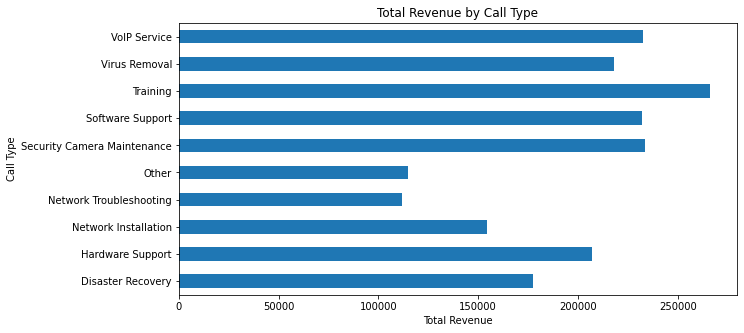

In [3]:
# Calculate the total revenue generated per call type and visualize it using a horizontal bar chart.
total_revenue = sales_data.groupby('Call Type')['Amount Billed'].sum()
total_revenue.plot(kind='barh', title='Total Revenue by Call Type', xlabel = 'Total Revenue', figsize =(10, 5))

<Axes: title={'center': 'Total Number of Calls in Each Month'}, xlabel='Opened Month', ylabel='Number of Calls'>

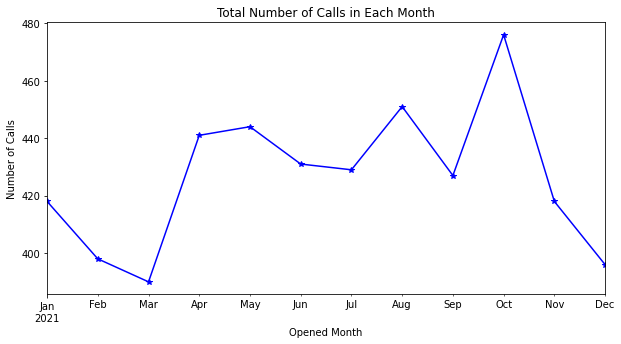

In [4]:
# Calculate the total number of calls for each month (based on Opened Date column) 
# and create a line chart to visualize the data.
number_of_calls_by_month = sales_data.groupby('Opened Month')['Call Type'].count()
number_of_calls_by_month.plot(title='Total Number of Calls in Each Month', style = '*-b',
                              ylabel = 'Number of Calls', figsize =(10, 5))

<Axes: title={'center': 'Top 3 Customers Based on Total Amount Billed'}, xlabel='Customer Name', ylabel='Amount Billed'>

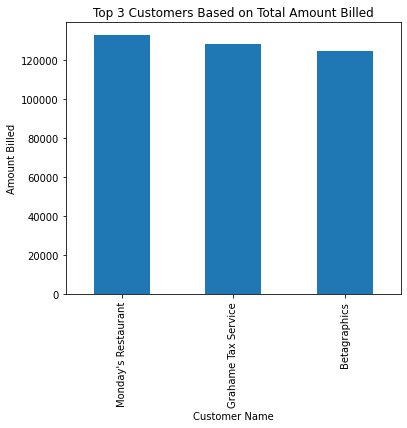

In [5]:
# Identify the top 3 customers based on the total amount billed and visualize it using a vertical bar chart.
total_amount_billed_per_customer = sales_data.groupby('Customer Name')['Amount Billed'].sum()
top_customers = total_amount_billed_per_customer.nlargest(3)
top_customers.plot(kind='bar', title='Top 3 Customers Based on Total Amount Billed', 
                   ylabel = 'Amount Billed', figsize = (6, 5))

<Axes: title={'center': 'Number Calls by Rate Lavel'}, ylabel='Rate Level'>

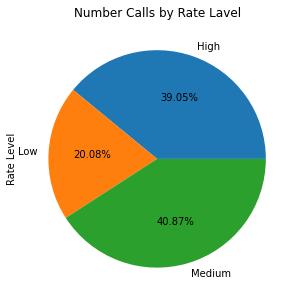

In [6]:
# Calculate the number of calls categorized by the Rate Level, Quick Resolution, and High Hours Logged columns, 
# and create a pie chart for each of these calculations (3 Pie charts).
number_of_calls_by_rate_level = sales_data.groupby('Rate Level')['Rate Level'].count()
number_of_calls_by_rate_level.plot(kind='pie', title='Number Calls by Rate Lavel', 
                                   figsize = (5, 5), autopct='%1.2f%%')

<Axes: title={'center': 'Number Calls with Quick Resolution'}, ylabel='Call Type'>

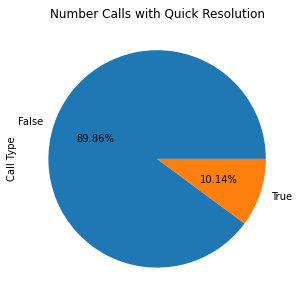

In [7]:
number_of_calls_by_rate_level = sales_data.groupby('Quick Resolution')['Call Type'].count()
number_of_calls_by_rate_level.plot(kind='pie', title='Number Calls with Quick Resolution', 
                                   figsize = (5, 5), autopct='%1.2f%%')

<Axes: title={'center': 'Number Calls by Rate Lavel'}, ylabel='High Hours Logged'>

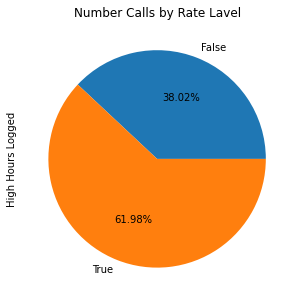

In [8]:
number_of_calls_by_high_hours_logged = sales_data.groupby('High Hours Logged')['High Hours Logged'].count()
number_of_calls_by_high_hours_logged.plot(kind='pie', title='Number Calls by Rate Lavel', 
                                          figsize = (5, 5), autopct='%1.2f%%')